<a href="https://colab.research.google.com/github/tashfeen786/MusicGenreClassification/blob/main/Task_06_MusicGenreClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [ ]:
from google.colab import files
files.upload()   # upload kaggle.json



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tashfeenaziz","key":"dea63daef1006ddbcb5719e8ffbe2976"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification


Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
100% 1.21G/1.21G [00:07<00:00, 128MB/s]
100% 1.21G/1.21G [00:07<00:00, 172MB/s]


In [ ]:
!unzip gtzan-dataset-music-genre-classification.zip -d gtzan_data


Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: gtzan_data/Data/features_30_sec.csv  
  inflating: gtzan_data/Data/features_3_sec.csv  
  inflating: gtzan_data/Data/genres_original/blues/blues.00000.wav  
  inflating: gtzan_data/Data/genres_original/blues/blues.00001.wav  
  inflating: gtzan_data/Data/genres_original/blues/blues.00002.wav  
  inflating: gtzan_data/Data/genres_original/blues/blues.00003.wav  
  inflating: gtzan_data/Data/genres_original/blues/blues.00004.wav  
  inflating: gtzan_data/Data/genres_original/blues/blues.00005.wav  
  inflating: gtzan_data/Data/genres_original/blues/blues.00006.wav  
  inflating: gtzan_data/Data/genres_original/blues/blues.00007.wav  
  inflating: gtzan_data/Data/genres_original/blues/blues.00008.wav  
  inflating: gtzan_data/Data/genres_original/blues/blues.00009.wav  
  inflating: gtzan_data/Data/genres_original/blues/blues.00010.wav  
  inflating: gtzan_data/Data/genres_original/blues/blues.00011.wav  
  inflating: gtz

In [ ]:
csv_path = "/content/gtzan_data/Data/features_3_sec.csv"   # check name after unzip
df = pd.read_csv(csv_path)

print("Dataset shape:", df.shape)
df.shape
df.head()

Dataset shape: (9990, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
# Features and labels
X = df.drop(columns=["filename", "label"])
y = df["label"]

In [ ]:
# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Build a simple DNN
tab_model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(len(np.unique(y)), activation="softmax")
])

tab_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Train
history = tab_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3852 - loss: 1.7121 - val_accuracy: 0.6632 - val_loss: 0.9780
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6223 - loss: 1.0699 - val_accuracy: 0.7257 - val_loss: 0.8124
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6834 - loss: 0.9095 - val_accuracy: 0.7503 - val_loss: 0.7365
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7292 - loss: 0.7873 - val_accuracy: 0.7658 - val_loss: 0.6686
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7456 - loss: 0.7405 - val_accuracy: 0.7793 - val_loss: 0.6424
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7518 - loss: 0.7040 - val_accuracy: 0.7943 - val_loss: 0.5964
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7776 - loss: 0.6512 - val_accuracy: 0.7998 - val_loss: 0.5814
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7863 - loss: 0.6173 - val_accuracy: 0.

In [ ]:
# Evaluate
y_pred = np.argmax(tab_model.predict(X_test), axis=1)
print("\nClassification Report (Tabular):")
print(classification_report(y_test, y_pred, target_names=le.classes_))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report (Tabular):
              precision    recall  f1-score   support

       blues       0.90      0.86      0.88       200
   classical       0.88      0.97      0.93       199
     country       0.87      0.81      0.84       199
       disco       0.86      0.80      0.83       200
      hiphop       0.89      0.85      0.87       200
        jazz       0.86      0.90      0.88       200
       metal       0.90      0.94      0.92       200
         pop       0.87      0.84      0.86       200
      reggae       0.84      0.87      0.86       200
        rock       0.79      0.81      0.80       200

    accuracy                           0.87      1998
   macro avg       0.87      0.87      0.87      1998
weighted avg       0.87      0.87      0.87      1998



In [ ]:
img_dir = "/content/gtzan_data/Data/images_original"

In [ ]:
# Image preprocessing
img_height, img_width = 128, 128
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    img_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset="training",
    class_mode="categorical"
)

val_gen = datagen.flow_from_directory(
    img_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset="validation",
    class_mode="categorical"
)


Found 800 images belonging to 10 classes.
Found 199 images belonging to 10 classes.


In [ ]:
#  Train CNN from scratch
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation="softmax")
])

cnn_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Train CNN
cnn_history = cnn_model.fit(train_gen, validation_data=val_gen, epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.1030 - loss: 2.4166 - val_accuracy: 0.1206 - val_loss: 2.2568
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.1673 - loss: 2.2233 - val_accuracy: 0.2864 - val_loss: 2.0052
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.2815 - loss: 1.9695 - val_accuracy: 0.3568 - val_loss: 1.8427
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.3240 - loss: 1.8568 - val_accuracy: 0.4221 - val_loss: 1.6586
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3540 - loss: 1.7745 - val_accuracy: 0.4070 - val_loss: 1.7481
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4269 - loss: 1.6194 - val_accuracy: 0.4573 - val_loss: 1.5510
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.4701 - loss: 1.4549 - val_accuracy: 0.4322 - val_loss: 1.6793
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5143 - loss: 1.4017 - val_accuracy: 0.4523 - val_loss:

In [ ]:
# Transfer Learning (VGG16 pretrained)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

tl_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation="softmax")
])

tl_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Train Transfer Learning Model
tl_history = tl_model.fit(train_gen, validation_data=val_gen, epochs=5)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 201s 8s/step - accuracy: 0.1154 - loss: 2.8347 - val_accuracy: 0.4221 - val_loss: 2.1450
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 194s 8s/step - accuracy: 0.2443 - loss: 2.1418 - val_accuracy: 0.3266 - val_loss: 2.0137
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 201s 8s/step - accuracy: 0.2452 - loss: 2.1001 - val_accuracy: 0.3970 - val_loss: 1.8994
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 198s 8s/step - accuracy: 0.2970 - loss: 1.9730 - val_accuracy: 0.3417 - val_loss: 1.8355
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 197s 8s/step - accuracy: 0.2822 - loss: 1.9416 - val_accuracy: 0.4221 - val_loss: 1.7697


In [ ]:
print("\n✅ Tabular Model Accuracy:", history.history["val_accuracy"][-1])
print("✅ CNN Model Accuracy:", cnn_history.history["val_accuracy"][-1])
print("✅ Transfer Learning (VGG16) Accuracy:", tl_history.history["val_accuracy"][-1])


✅ Tabular Model Accuracy: 0.8658658862113953
✅ CNN Model Accuracy: 0.4673366844654083
✅ Transfer Learning (VGG16) Accuracy: 0.42211055755615234


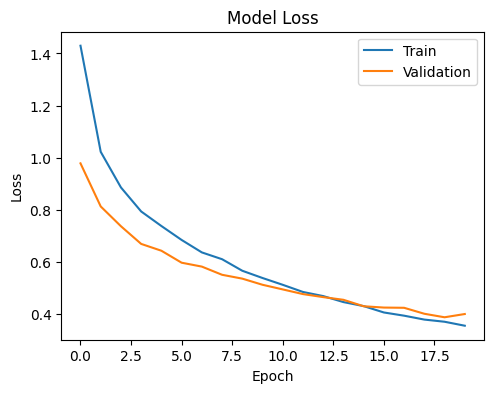

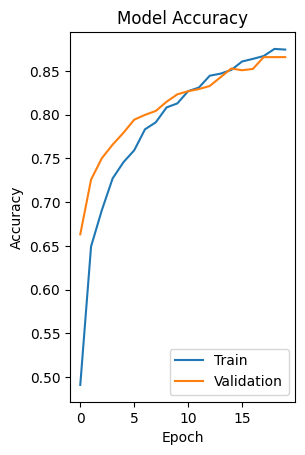

In [ ]:
# compare result of model plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


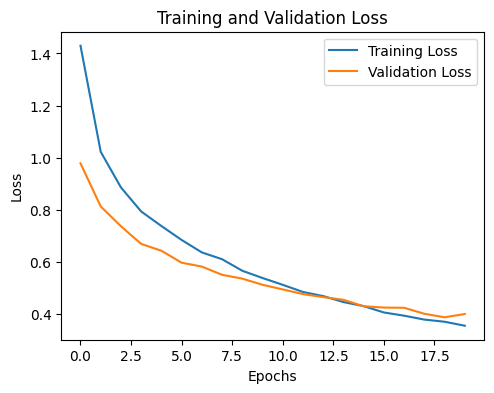

In [ ]:
# now plot for CNN model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()